# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

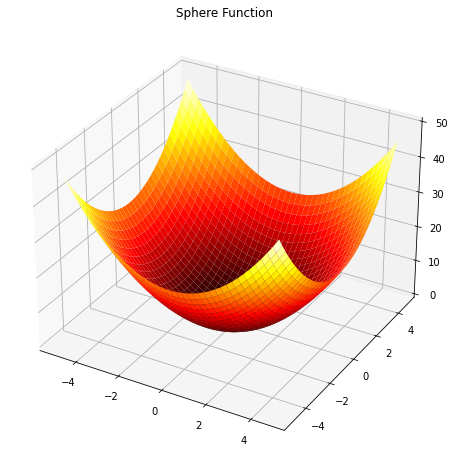

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

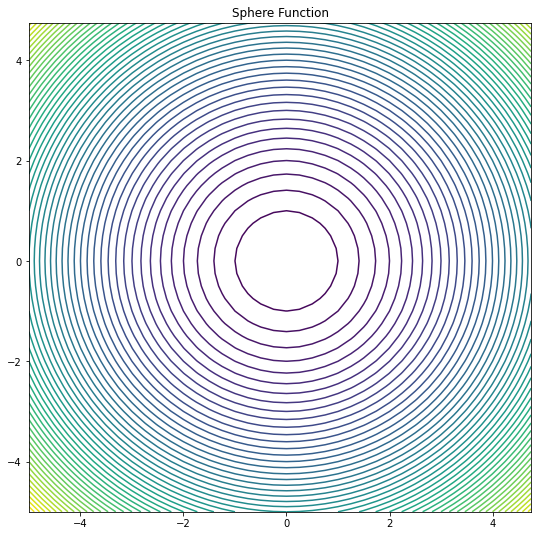

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

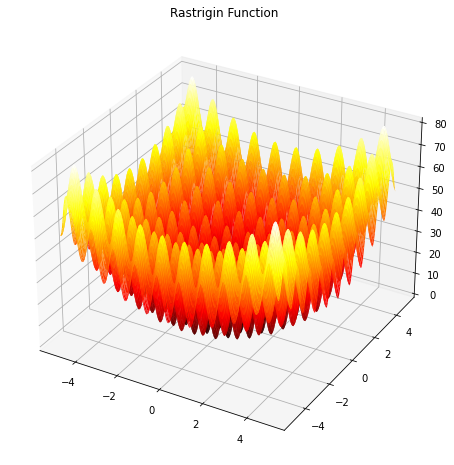

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

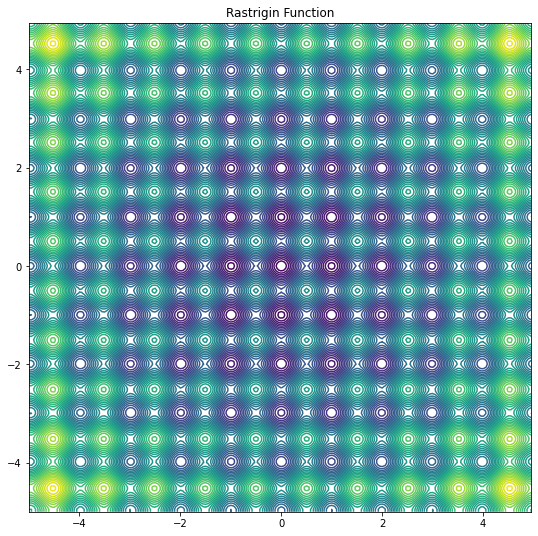

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

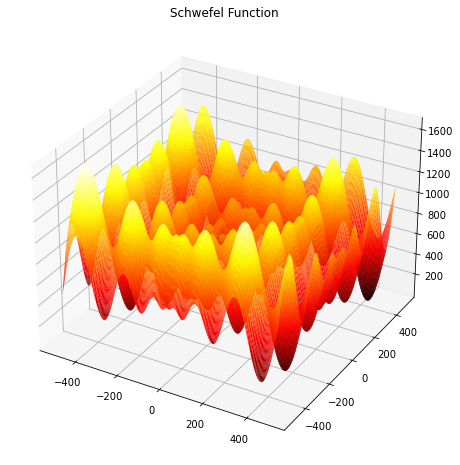

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

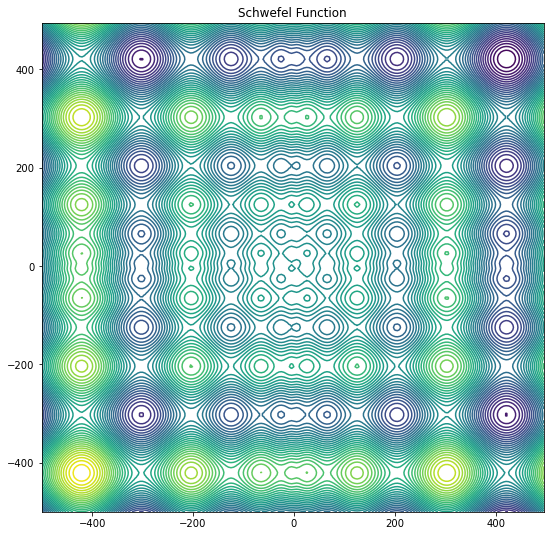

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

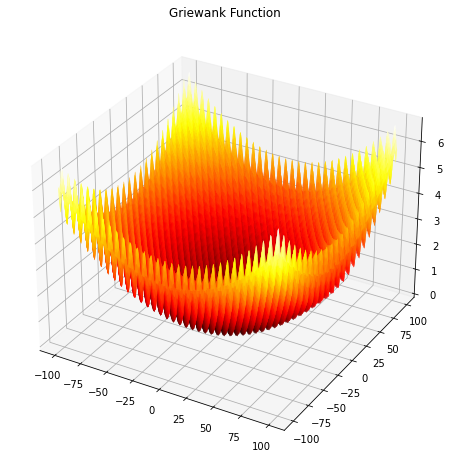

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

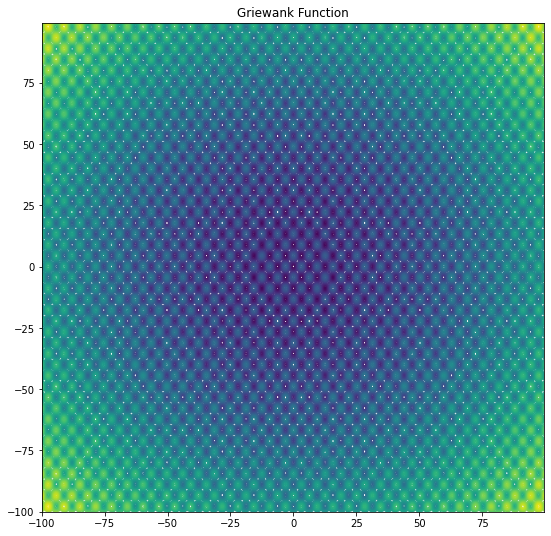

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [38]:
N = 250
d = 2

objective_function = objective_function_F1a
objective_function2 = objective_function_F6
objective_function3 = objective_function_F7
objective_function4 = objective_function_F8

original_individual = np.array([[1, 1]])

#### Zadanie 2

##### Sphere function

In [37]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = 0.25
for i in range(1000):
    og_objective_value = objective_function(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(results), np.mean(best_mutants))

123.743 -1.7071971887713484


##### Rastrigin function

In [39]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = 0.25
for i in range(1000):
    og_objective_value = objective_function2(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function2(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(results), np.mean(best_mutants))

123.743 -2.089872279356591


##### Schwefel function

In [40]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = 0.25
for i in range(1000):
    og_objective_value = objective_function3(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function3(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(results), np.mean(best_mutants))

123.743 -835.1521256051011


##### Griewank function

In [41]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = 0.25
for i in range(1000):
    og_objective_value = objective_function4(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function4(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(results), np.mean(best_mutants))

123.743 -0.18380953175790457


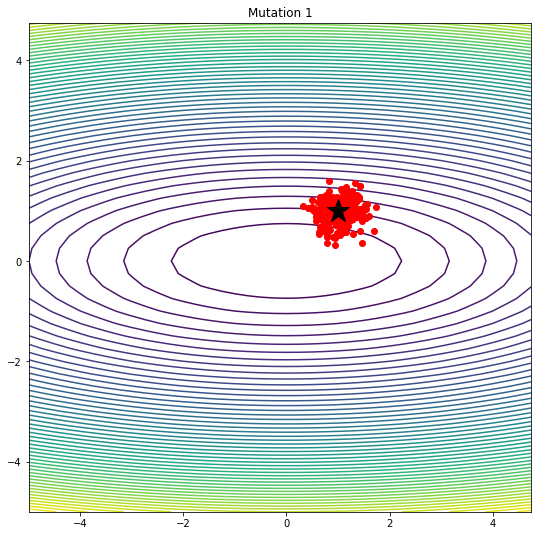

In [18]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

##### Sphere function

In [30]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = np.array([0.25, 0.5])
for i in range(1000):
    og_objective_value = objective_function(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

123.998 -0.4746695326596801


##### Rastrigin function

In [43]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = np.array([0.25, 0.5])
for i in range(1000):
    og_objective_value = objective_function2(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function2(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

0.7 -1.8179764633820055


##### Schwefel function

In [44]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = np.array([0.25, 0.5])
for i in range(1000):
    og_objective_value = objective_function3(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function3(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

126.593 -834.5124026874596


##### Griewank function

In [45]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
sigma = np.array([0.25, 0.5])
for i in range(1000):
    og_objective_value = objective_function4(original_individual)
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut_objective_values = objective_function4(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

105.933 -0.12442337226931707


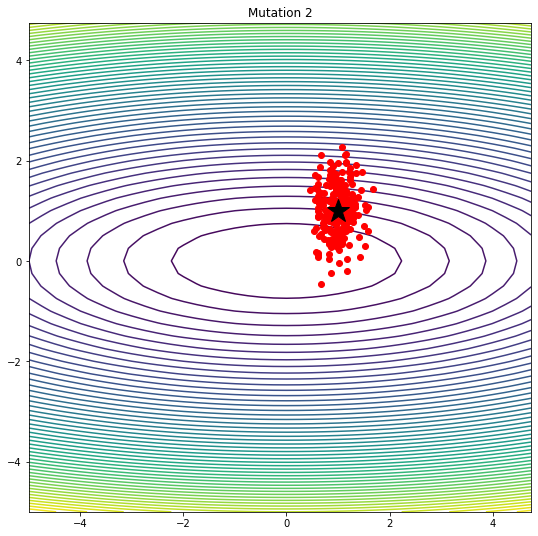

In [20]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

##### Sphere function

In [31]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
S = np.array([[0.25, 0.25],[0.25, 0.5]])
for i in range(1000):
    og_objective_value = objective_function(original_individual)
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    mut_objective_values = objective_function(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

123.578 -0.041962317823146904


##### Rastrigin function

In [46]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
S = np.array([[0.25, 0.25],[0.25, 0.5]])
for i in range(1000):
    og_objective_value = objective_function2(original_individual)
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    mut_objective_values = objective_function2(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

1.1 -1.4870839753559058


##### Schwefel function

In [47]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
S = np.array([[0.25, 0.25],[0.25, 0.5]])
for i in range(1000):
    og_objective_value = objective_function3(original_individual)
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    mut_objective_values = objective_function3(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

125.337 -832.8613718060085


##### Griewank function

In [48]:
better_mutants = np.zeros(1000)
best_mutants = np.zeros(1000)
S = np.array([[0.25, 0.25],[0.25, 0.5]])
for i in range(1000):
    og_objective_value = objective_function4(original_individual)
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    mut_objective_values = objective_function4(mutations)
    better_mutants[i] = len(mut_objective_values[mut_objective_values > og_objective_value])
    best_mutants[i] = np.amax(mut_objective_values)
print(np.mean(better_mutants), np.mean(best_mutants))

117.684 -0.005297893135329352


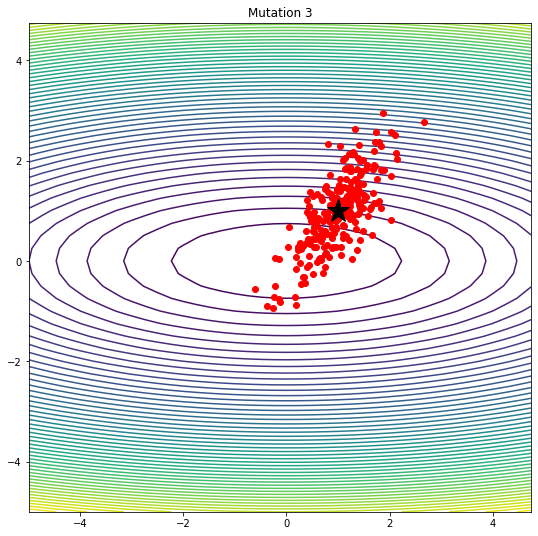

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [51]:
def es(schwefel, objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        if schwefel:
            children_population_solutions[children_population_solutions < -500] = -500 + 100 * np.random.rand()
            children_population_solutions[children_population_solutions > 500] = 500 - 100 * np.random.rand()

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

In [52]:
def test_and_plot(schwefel, objective_function, d, N, T, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency):

    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    schwefel, objective_function, d, N, T, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency)
    
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

#### d = 10

Iteration 0000 : best score = -6458.09918320, mean score = -26463.68091750.
Iteration 0010 : best score = -24.80428598, mean score = -203.69462922.
Iteration 0020 : best score = -0.04462091, mean score = -0.44783838.
Iteration 0030 : best score = -0.00016787, mean score = -0.00083681.
Iteration 0040 : best score = -0.00000015, mean score = -0.00000149.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


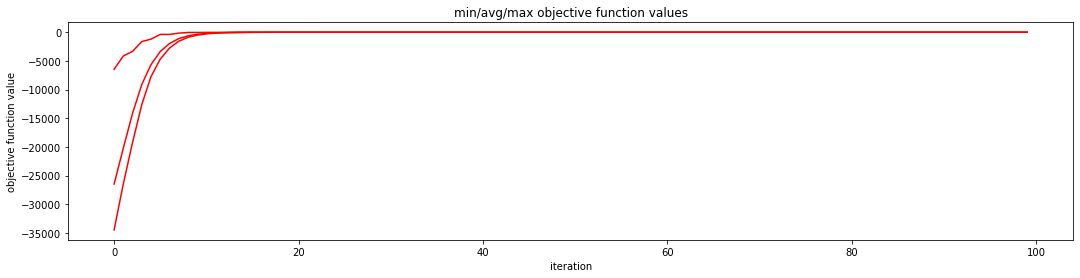

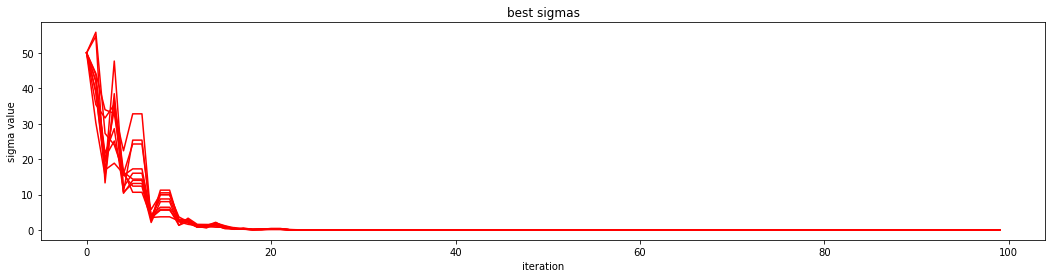

In [246]:
test_and_plot(0, objective_function_F1, 10, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 10)

#### d = 20

Iteration 0000 : best score = -26773.96620308, mean score = -59340.49796750.
Iteration 0010 : best score = -931.84550989, mean score = -2069.77135141.
Iteration 0020 : best score = -11.58605517, mean score = -42.77385713.
Iteration 0030 : best score = -0.47642160, mean score = -1.16086591.
Iteration 0040 : best score = -0.00988460, mean score = -0.02864200.
Iteration 0050 : best score = -0.00035063, mean score = -0.00075377.
Iteration 0060 : best score = -0.00000746, mean score = -0.00001826.
Iteration 0070 : best score = -0.00000018, mean score = -0.00000049.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


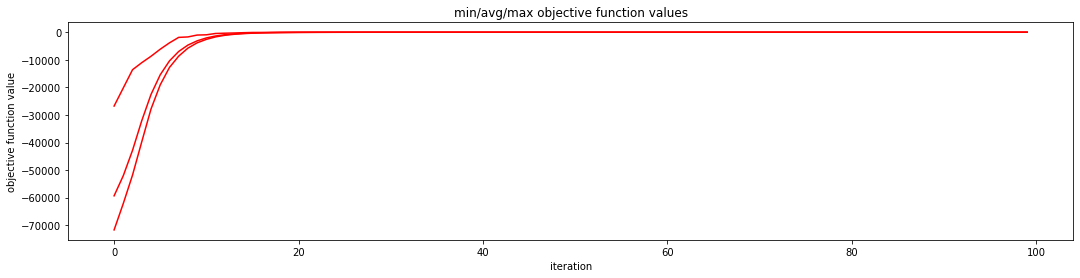

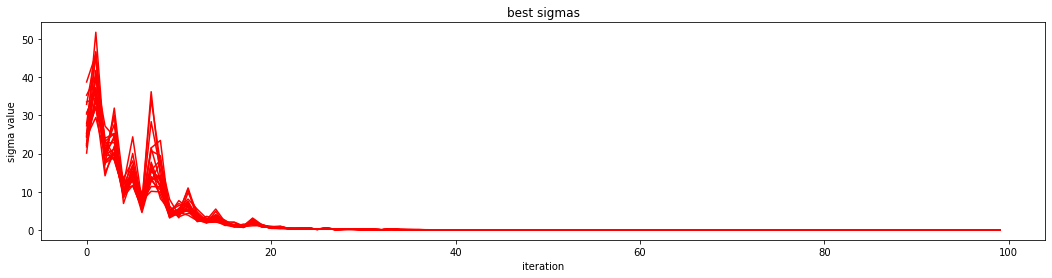

In [250]:
test_and_plot(0, objective_function_F1, 20, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 10)

#### d = 50

Iteration 0000 : best score = -94304.71397200, mean score = -160488.46041819.
Iteration 0010 : best score = -18742.65689471, mean score = -28598.14810491.
Iteration 0020 : best score = -3273.37835920, mean score = -4970.42924288.
Iteration 0030 : best score = -655.91900897, mean score = -946.45498836.
Iteration 0040 : best score = -135.24642084, mean score = -187.62392516.
Iteration 0050 : best score = -28.75180743, mean score = -39.91719976.
Iteration 0060 : best score = -6.75768740, mean score = -9.34300457.
Iteration 0070 : best score = -1.62450465, mean score = -2.18435983.
Iteration 0080 : best score = -0.36061445, mean score = -0.49260226.
Iteration 0090 : best score = -0.08875105, mean score = -0.11988119.


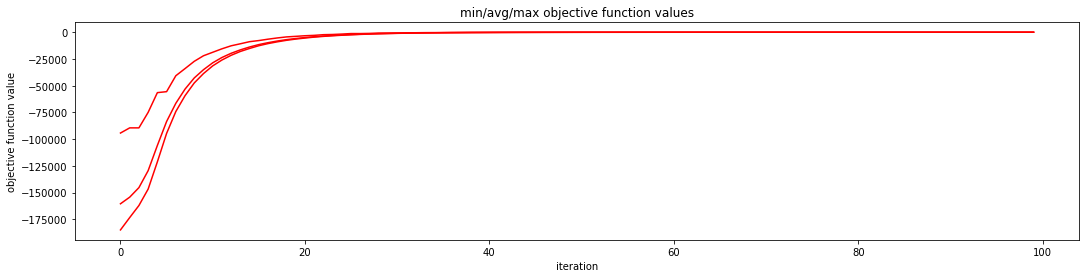

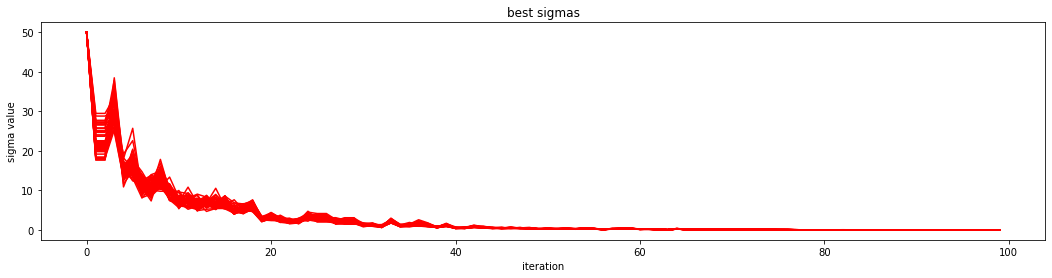

In [251]:
test_and_plot(0, objective_function_F1, 50, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 10)

#### d = 100

Iteration 0000 : best score = -245147.32893753, mean score = -330273.35984321.
Iteration 0010 : best score = -102406.81553859, mean score = -131617.25925261.
Iteration 0020 : best score = -38463.00934999, mean score = -47456.70918950.
Iteration 0030 : best score = -18629.22444161, mean score = -22127.53669322.
Iteration 0040 : best score = -9086.90519524, mean score = -10485.75671095.
Iteration 0050 : best score = -4175.58670205, mean score = -5132.63289655.
Iteration 0060 : best score = -1999.57667447, mean score = -2432.18264041.
Iteration 0070 : best score = -971.96502877, mean score = -1162.59224192.
Iteration 0080 : best score = -486.13521470, mean score = -559.30182985.
Iteration 0090 : best score = -244.80895009, mean score = -282.00154004.


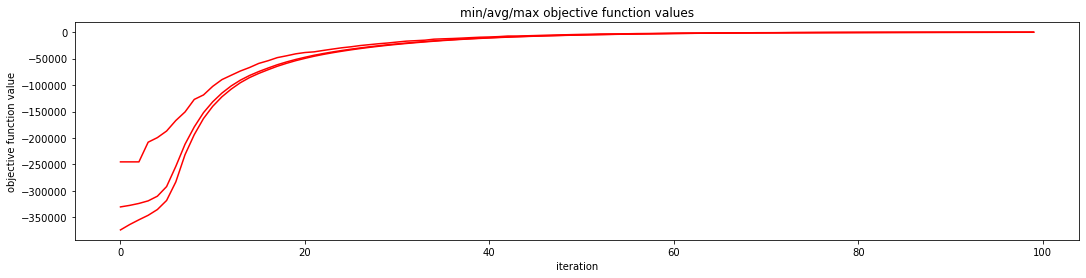

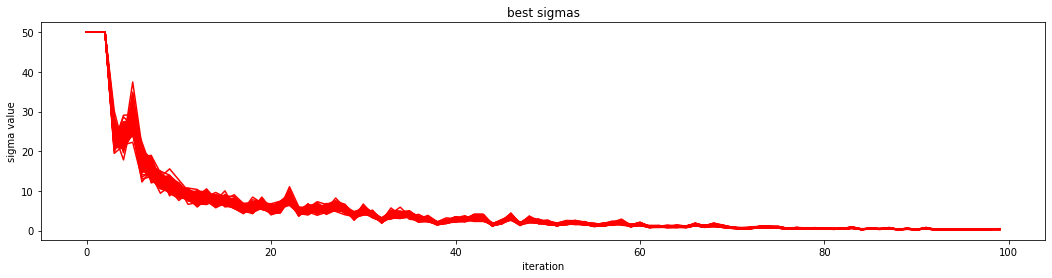

In [252]:
test_and_plot(0, objective_function_F1, 100, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

#### d = 10

Iteration 0000 : best score = -6347.46366769, mean score = -26522.08136728.
Iteration 0010 : best score = -108.32630612, mean score = -316.80623665.
Iteration 0020 : best score = -25.12984926, mean score = -74.64353586.
Iteration 0030 : best score = -23.89885954, mean score = -60.69086478.
Iteration 0040 : best score = -21.79910636, mean score = -54.95861461.
Iteration 0050 : best score = -20.38976438, mean score = -50.51932841.
Iteration 0060 : best score = -0.20608505, mean score = -2.60013600.
Iteration 0070 : best score = -0.00089424, mean score = -0.00653309.
Iteration 0080 : best score = -0.00000268, mean score = -0.00001445.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000003.


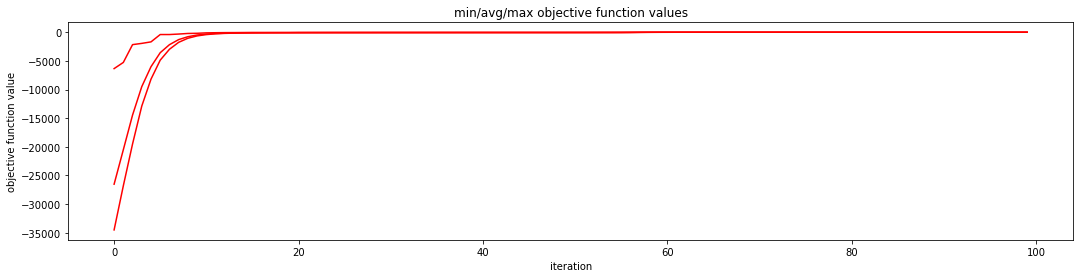

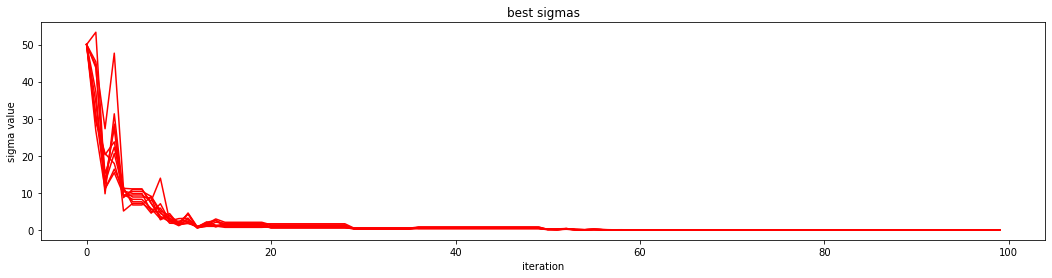

In [248]:
test_and_plot(0, objective_function_F6, 10, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 10)

#### d = 20

Iteration 0000 : best score = -21504.39789772, mean score = -59550.74878800.
Iteration 0010 : best score = -1156.64951652, mean score = -2674.51565506.
Iteration 0020 : best score = -172.29065904, mean score = -259.13547158.
Iteration 0030 : best score = -104.47796629, mean score = -172.83769060.
Iteration 0040 : best score = -104.47796629, mean score = -154.40815591.
Iteration 0050 : best score = -98.03777616, mean score = -145.45137446.
Iteration 0060 : best score = -90.72263478, mean score = -140.06683945.
Iteration 0070 : best score = -86.96595981, mean score = -135.49531767.
Iteration 0080 : best score = -69.33850630, mean score = -128.58532864.
Iteration 0090 : best score = -19.58679235, mean score = -25.56710978.


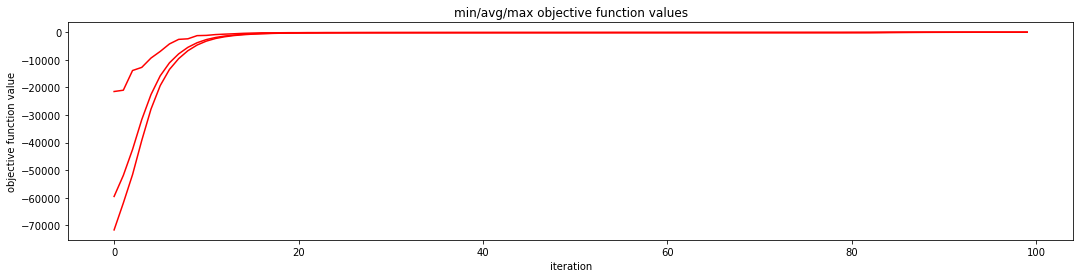

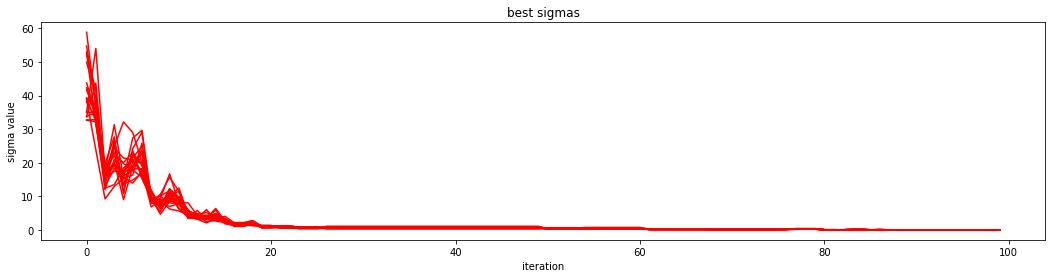

In [253]:
test_and_plot(0, objective_function_F6, 20, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 10)

#### d = 50

Iteration 0000 : best score = -83109.59982001, mean score = -161396.08056062.
Iteration 0010 : best score = -20536.62782198, mean score = -30261.14748894.
Iteration 0020 : best score = -4231.39675513, mean score = -5967.47481852.
Iteration 0030 : best score = -1288.60507153, mean score = -1674.97633896.
Iteration 0040 : best score = -655.20785638, mean score = -796.28004046.
Iteration 0050 : best score = -486.88474185, mean score = -607.46517569.
Iteration 0060 : best score = -436.94563255, mean score = -542.91518370.
Iteration 0070 : best score = -434.23768308, mean score = -511.88583567.
Iteration 0080 : best score = -414.35297441, mean score = -492.40102545.
Iteration 0090 : best score = -338.10084363, mean score = -445.69072162.


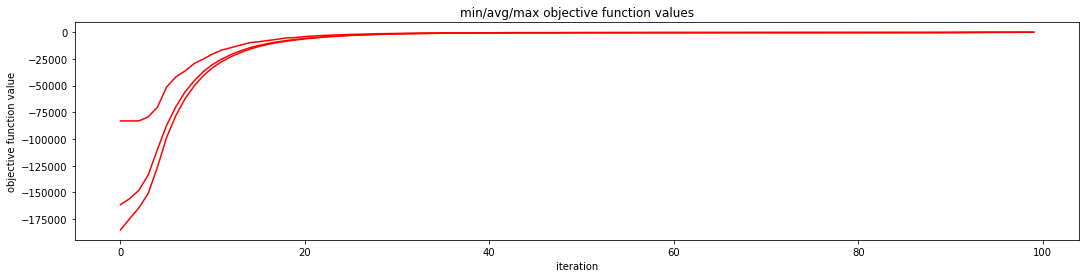

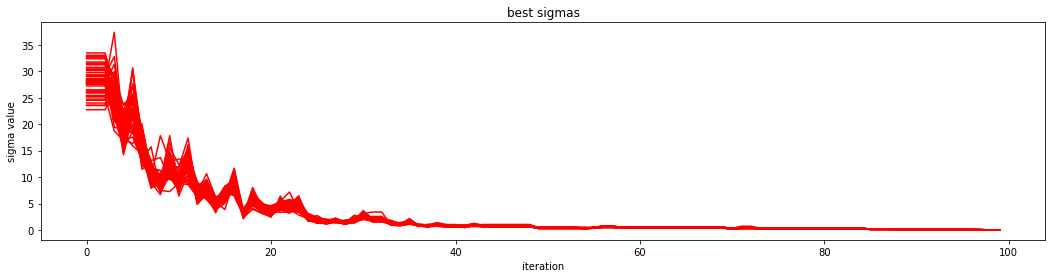

In [254]:
test_and_plot(0, objective_function_F6, 50, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 10)

#### d = 100

Iteration 0000 : best score = -241391.52597951, mean score = -330426.95265835.
Iteration 0010 : best score = -103122.44975461, mean score = -125845.85339290.
Iteration 0020 : best score = -41058.08779943, mean score = -47411.54811482.
Iteration 0030 : best score = -18502.87443925, mean score = -22495.42341752.
Iteration 0040 : best score = -10067.74370161, mean score = -11382.49104387.
Iteration 0050 : best score = -5026.69391631, mean score = -6153.18296827.
Iteration 0060 : best score = -3212.71328981, mean score = -3614.17208862.
Iteration 0070 : best score = -2134.00650945, mean score = -2407.50806428.
Iteration 0080 : best score = -1592.79343468, mean score = -1831.50633880.
Iteration 0090 : best score = -1351.47386567, mean score = -1535.80227103.


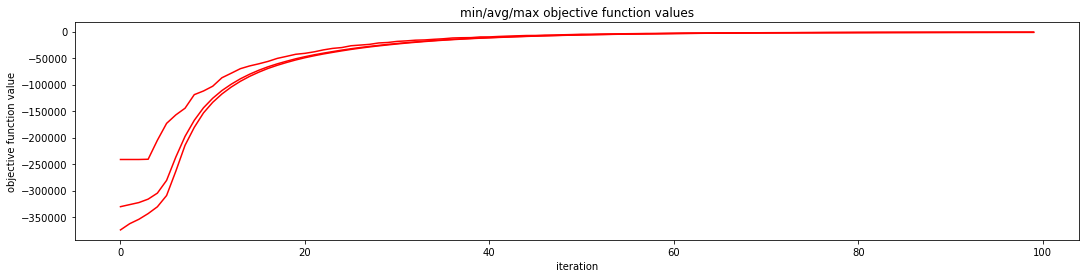

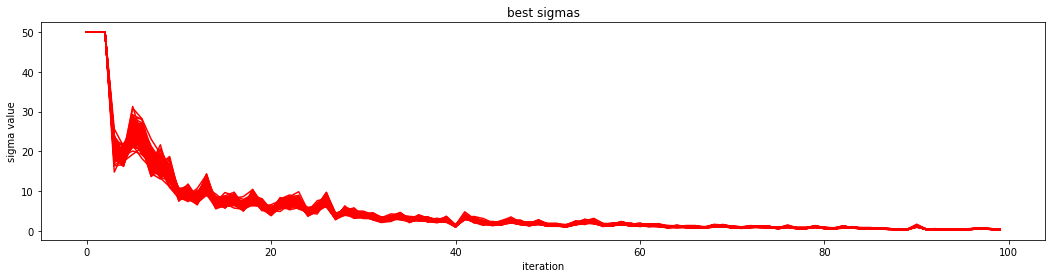

In [255]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

#### d = 10

Iteration 0000 : best score = -2.64596223, mean score = -7.66544016.
Iteration 0010 : best score = -0.69483622, mean score = -1.05355173.
Iteration 0020 : best score = -0.05874521, mean score = -0.30174889.
Iteration 0030 : best score = -0.00036806, mean score = -0.00183000.
Iteration 0040 : best score = -0.00000249, mean score = -0.00001120.
Iteration 0050 : best score = -0.00000001, mean score = -0.00000006.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


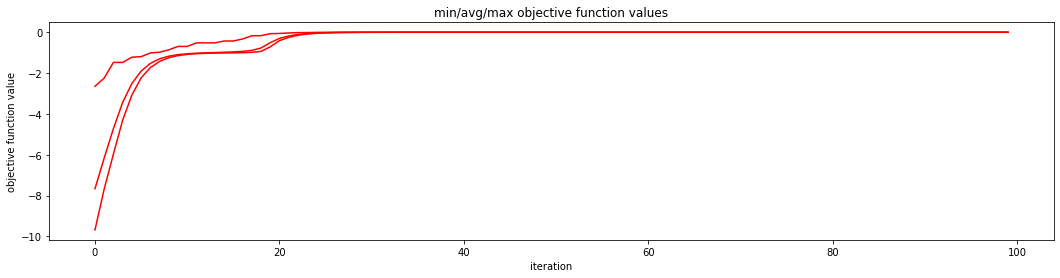

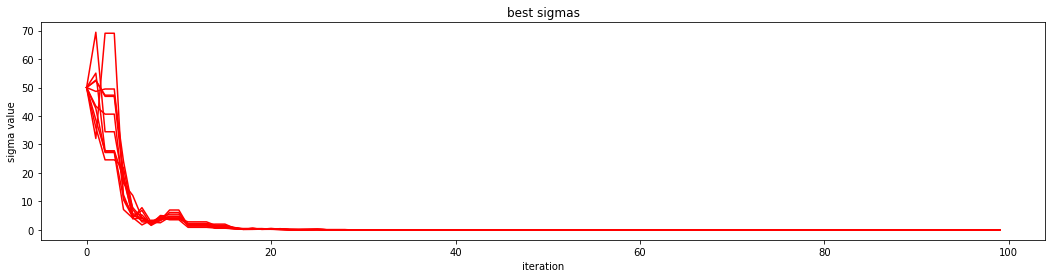

In [249]:
test_and_plot(0, objective_function_F8, 10, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 10)

#### d = 20

Iteration 0000 : best score = -5.39868163, mean score = -15.98669821.
Iteration 0010 : best score = -1.27877150, mean score = -1.64276983.
Iteration 0020 : best score = -0.75766027, mean score = -1.00876203.
Iteration 0030 : best score = -0.05404103, mean score = -0.10683452.
Iteration 0040 : best score = -0.00755188, mean score = -0.01273806.
Iteration 0050 : best score = -0.00057783, mean score = -0.00150816.
Iteration 0060 : best score = -0.00004710, mean score = -0.00011016.
Iteration 0070 : best score = -0.00000211, mean score = -0.00000609.
Iteration 0080 : best score = -0.00000018, mean score = -0.00000039.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000002.


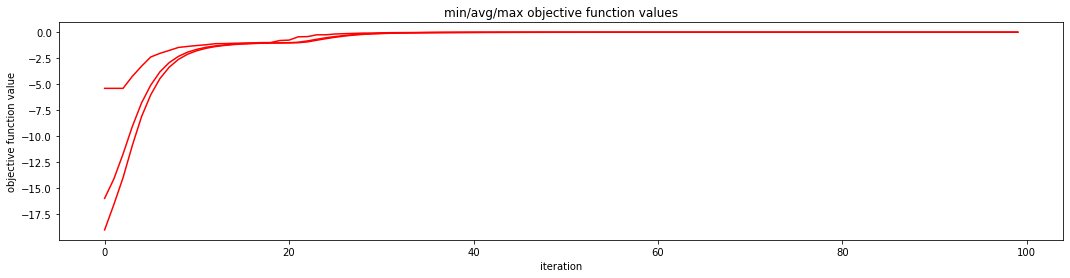

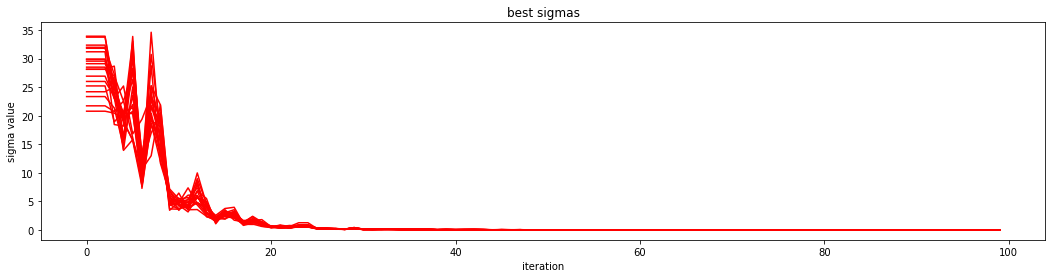

In [256]:
test_and_plot(0, objective_function_F8, 20, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 10)

#### d = 50

Iteration 0000 : best score = -25.87686422, mean score = -41.31647650.
Iteration 0010 : best score = -5.57301527, mean score = -8.23447958.
Iteration 0020 : best score = -2.00151928, mean score = -2.43193877.
Iteration 0030 : best score = -1.21959947, mean score = -1.31290387.
Iteration 0040 : best score = -1.05167951, mean score = -1.07089421.
Iteration 0050 : best score = -0.75872636, mean score = -0.86180041.
Iteration 0060 : best score = -0.36018640, mean score = -0.42888842.
Iteration 0070 : best score = -0.19362430, mean score = -0.23241491.
Iteration 0080 : best score = -0.10523624, mean score = -0.12663586.
Iteration 0090 : best score = -0.05614872, mean score = -0.06895772.


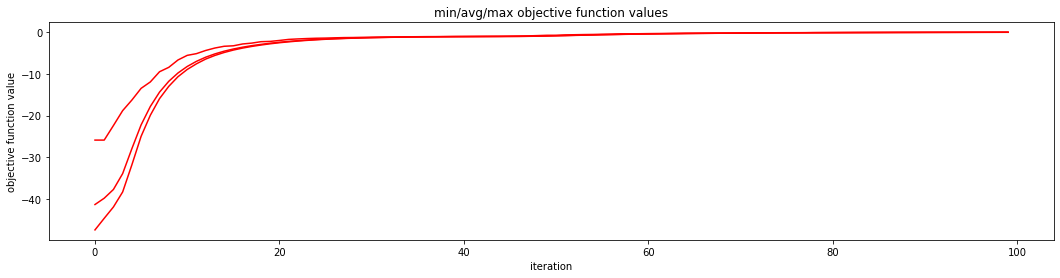

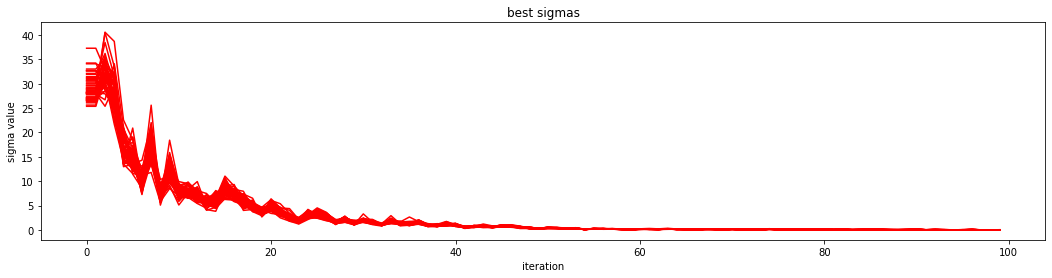

In [257]:
test_and_plot(0, objective_function_F8, 50, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 10)

#### d = 100

Iteration 0000 : best score = -63.50717714, mean score = -83.13952036.
Iteration 0010 : best score = -26.07244648, mean score = -33.31396485.
Iteration 0020 : best score = -10.17478211, mean score = -12.39124863.
Iteration 0030 : best score = -5.18061887, mean score = -5.99624155.
Iteration 0040 : best score = -3.02035516, mean score = -3.35173943.
Iteration 0050 : best score = -1.95638764, mean score = -2.17302565.
Iteration 0060 : best score = -1.48395731, mean score = -1.58010670.
Iteration 0070 : best score = -1.23610871, mean score = -1.28253068.
Iteration 0080 : best score = -1.11883717, mean score = -1.14105712.
Iteration 0090 : best score = -1.05619424, mean score = -1.06977527.


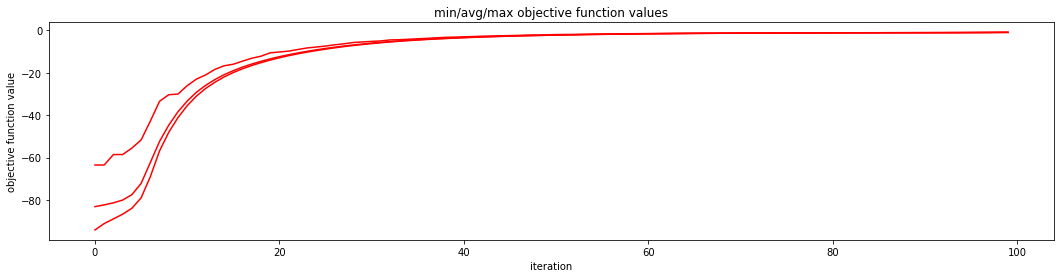

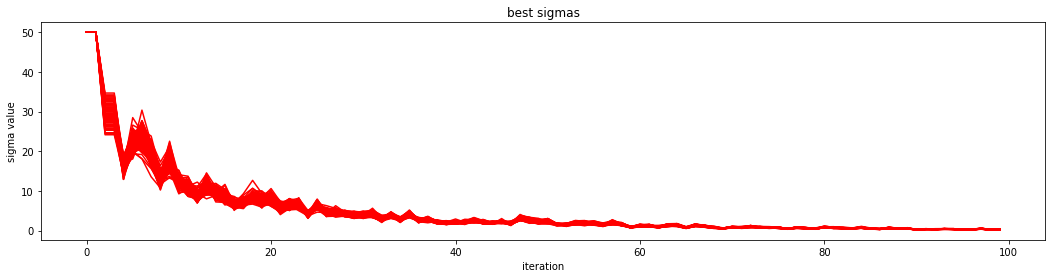

In [258]:
test_and_plot(0, objective_function_F8, 100, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

### Działanie strategii ewolucyjnej dla funkcji Schwefela F7

#### d = 10

Iteration 0000 : best score = -3397.16836311, mean score = -3964.54877108.
Iteration 0010 : best score = -895.04400866, mean score = -2487.64688898.
Iteration 0020 : best score = -2.15248618, mean score = -1639.83819862.
Iteration 0030 : best score = -2.15248618, mean score = -1268.25941497.
Iteration 0040 : best score = -2.15248618, mean score = -1081.18461260.
Iteration 0050 : best score = -2.15248618, mean score = -1023.73275867.
Iteration 0060 : best score = -2.15248618, mean score = -967.69509827.
Iteration 0070 : best score = -2.15248618, mean score = -933.84221806.
Iteration 0080 : best score = -2.15248618, mean score = -837.84408148.
Iteration 0090 : best score = -0.00405653, mean score = -796.82262855.


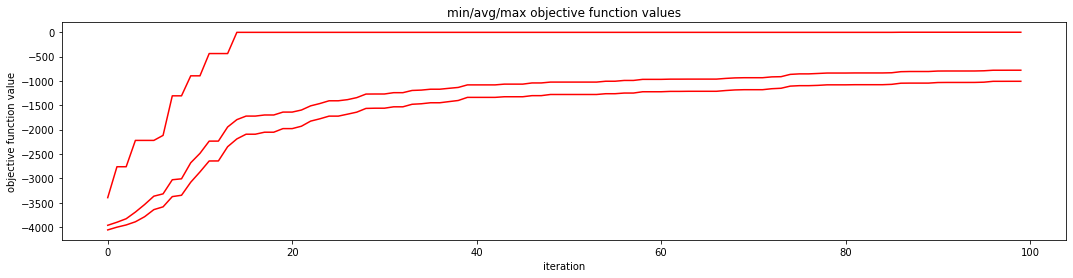

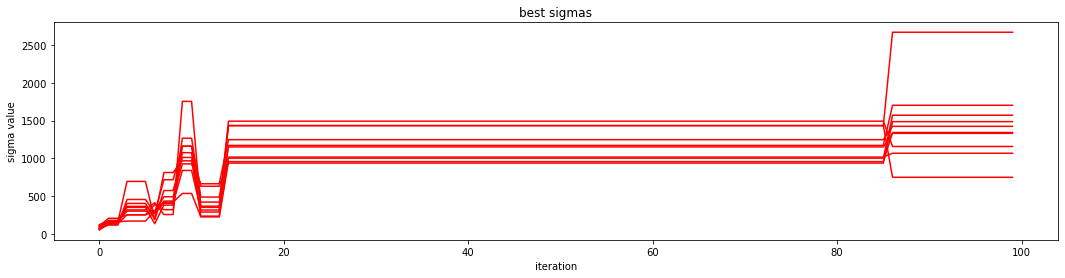

In [194]:
test_and_plot(1, objective_function_F7, 10, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 10)

#### d = 20

Iteration 0000 : best score = -7189.00534991, mean score = -8028.21034871.
Iteration 0010 : best score = -2663.98924703, mean score = -5942.88358955.
Iteration 0020 : best score = -1177.40472347, mean score = -4342.34160377.
Iteration 0030 : best score = -1177.40472347, mean score = -4072.77736123.
Iteration 0040 : best score = -1177.40472347, mean score = -3730.88156141.
Iteration 0050 : best score = -1177.40472347, mean score = -3684.47415112.
Iteration 0060 : best score = -1177.40472347, mean score = -3173.76993015.
Iteration 0070 : best score = -1015.85610445, mean score = -3079.82376847.
Iteration 0080 : best score = -1015.85610445, mean score = -3020.72180575.
Iteration 0090 : best score = -876.13132689, mean score = -2664.67932479.


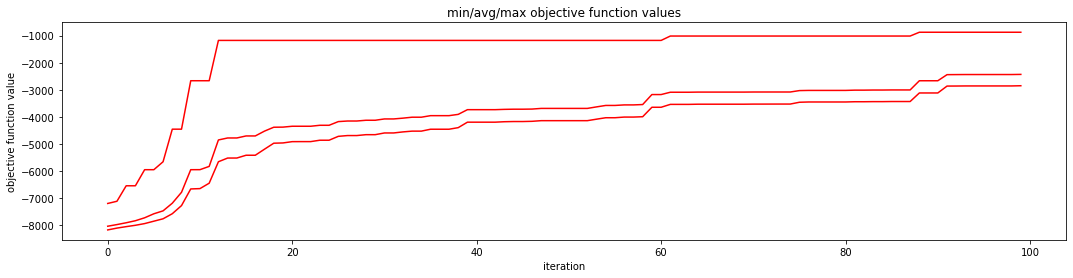

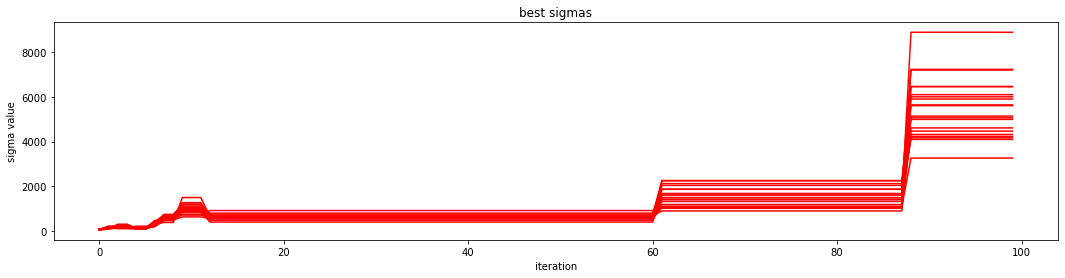

In [195]:
test_and_plot(1, objective_function_F7, 20, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 10)

#### d = 50

Iteration 0000 : best score = -19338.10321271, mean score = -20254.30935867.
Iteration 0010 : best score = -13891.39583348, mean score = -18685.33844943.
Iteration 0020 : best score = -11006.45747534, mean score = -15183.14949625.
Iteration 0030 : best score = -10219.37124923, mean score = -14832.69282340.
Iteration 0040 : best score = -9315.93320372, mean score = -13548.91828956.
Iteration 0050 : best score = -6907.08607727, mean score = -11051.08205799.
Iteration 0060 : best score = -6907.08607727, mean score = -11017.92546998.
Iteration 0070 : best score = -6907.08607727, mean score = -10322.03786926.
Iteration 0080 : best score = -6907.08607727, mean score = -10235.84600793.
Iteration 0090 : best score = -6825.39439349, mean score = -9848.99321347.


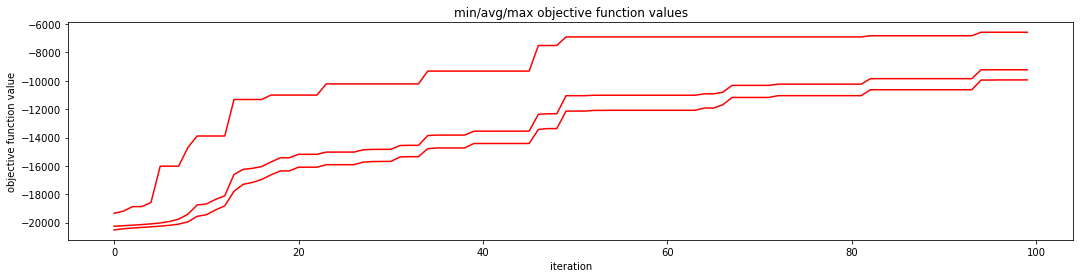

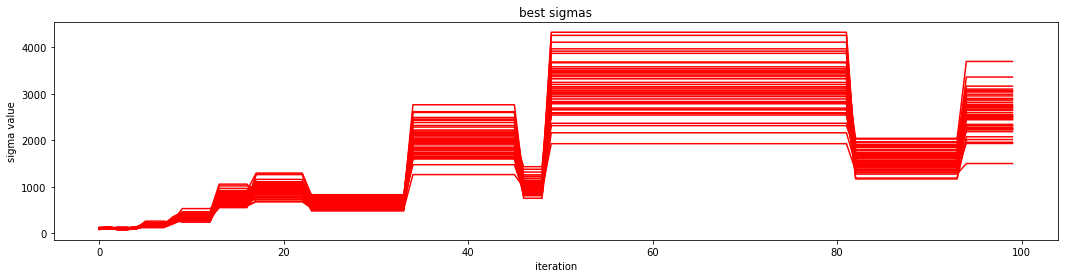

In [196]:
test_and_plot(1, objective_function_F7, 50, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 10)

#### d = 100

Iteration 0000 : best score = -39542.22729247, mean score = -40604.78636948.
Iteration 0010 : best score = -38468.02943016, mean score = -40425.64621247.
Iteration 0020 : best score = -37160.94475679, mean score = -37730.22215895.
Iteration 0030 : best score = -36090.01462052, mean score = -36191.11639326.
Iteration 0040 : best score = -35762.95573869, mean score = -35805.51168527.
Iteration 0050 : best score = -35632.29249363, mean score = -35658.19003089.
Iteration 0060 : best score = -35583.72744811, mean score = -35590.81605609.
Iteration 0070 : best score = -35557.03188332, mean score = -35560.74011347.
Iteration 0080 : best score = -35545.34002732, mean score = -35547.08188513.
Iteration 0090 : best score = -35540.04666440, mean score = -35540.88534746.


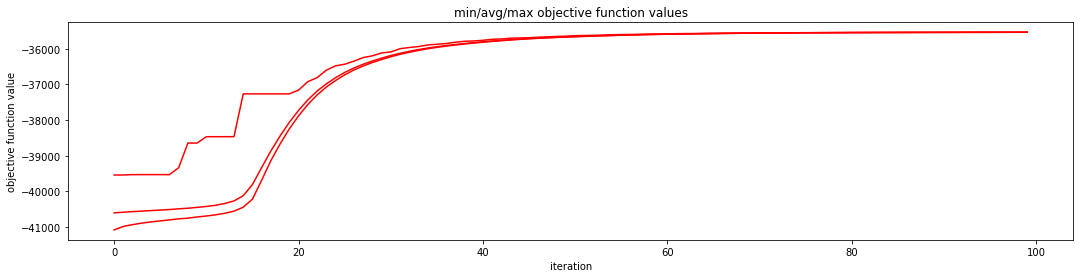

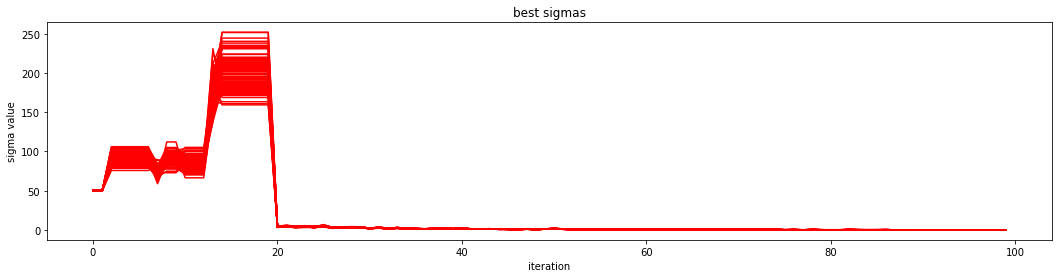

In [197]:
test_and_plot(1, objective_function_F7, 100, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

### Testowanie parametrów dla funkcji Rastrigina dla d = 100

#### N = 1000

Iteration 0000 : best score = -233894.61881936, mean score = -330334.50361822.
Iteration 0010 : best score = -71224.01072998, mean score = -84420.37206903.
Iteration 0020 : best score = -21091.05903322, mean score = -25165.58277937.
Iteration 0030 : best score = -8312.71459762, mean score = -9602.16751747.
Iteration 0040 : best score = -3612.02923759, mean score = -4183.18879804.
Iteration 0050 : best score = -2005.48019544, mean score = -2281.78260803.
Iteration 0060 : best score = -1379.82763650, mean score = -1609.59394429.
Iteration 0070 : best score = -1221.25486331, mean score = -1362.13451352.
Iteration 0080 : best score = -1073.32208937, mean score = -1265.07049920.
Iteration 0090 : best score = -828.27179213, mean score = -883.64567532.


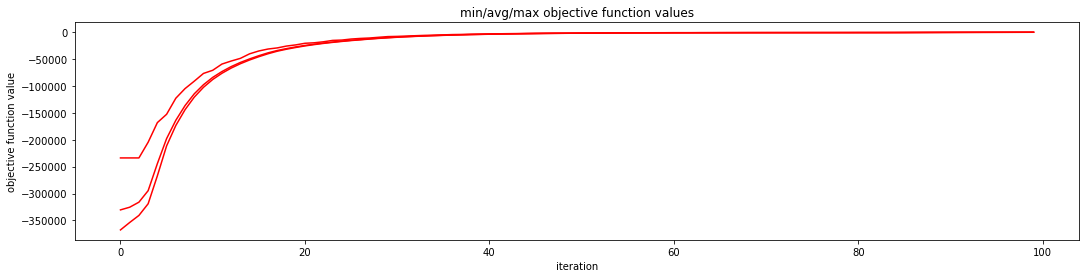

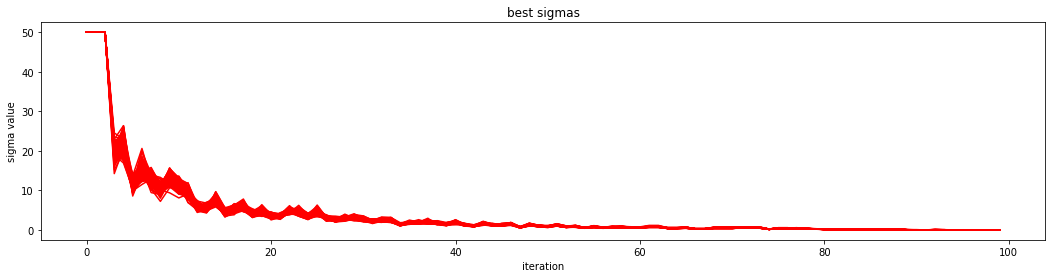

In [57]:
test_and_plot(0, objective_function_F6, 100, 1000, 100, 4000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### N = 4000

Iteration 0000 : best score = -228894.58008101, mean score = -331718.99564574.
Iteration 0010 : best score = -155458.14933082, mean score = -233070.49160714.
Iteration 0020 : best score = -65664.38925802, mean score = -89536.18338461.
Iteration 0030 : best score = -39171.06371536, mean score = -49208.58575001.
Iteration 0040 : best score = -24631.29444364, mean score = -29980.45809486.
Iteration 0050 : best score = -15912.59024966, mean score = -18815.62012977.
Iteration 0060 : best score = -10200.58594686, mean score = -12110.27247059.
Iteration 0070 : best score = -6671.56662698, mean score = -7925.73447514.
Iteration 0080 : best score = -4537.21903588, mean score = -5310.62745966.
Iteration 0090 : best score = -3200.45742838, mean score = -3668.50545292.


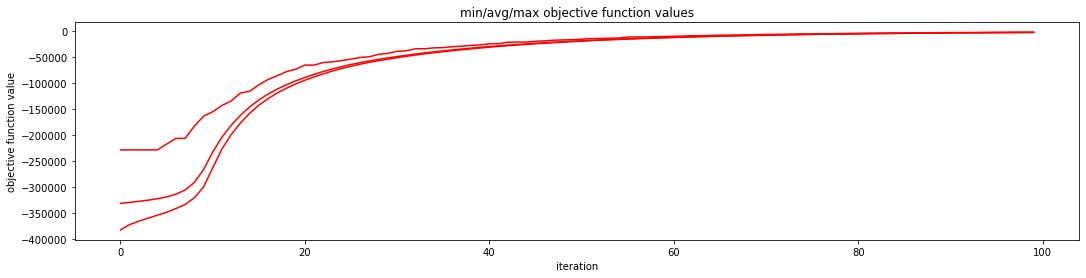

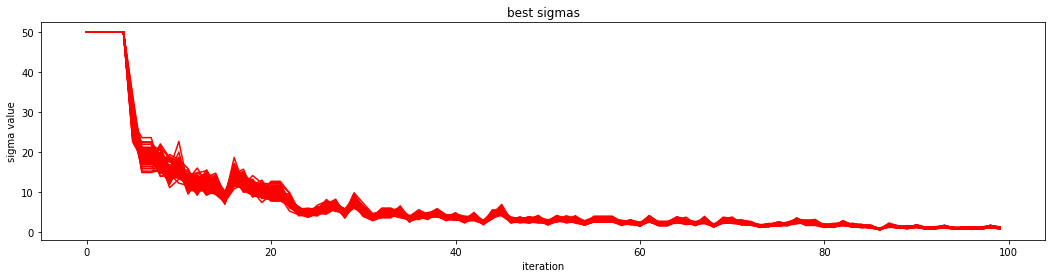

In [59]:
test_and_plot(0, objective_function_F6, 100, 4000, 100, 4000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### T = 500

Iteration 0000 : best score = -241533.00543147, mean score = -329269.16155440.
Iteration 0050 : best score = -4851.26417583, mean score = -5647.35998819.
Iteration 0100 : best score = -1237.60702405, mean score = -1408.27169037.
Iteration 0150 : best score = -547.29459530, mean score = -565.64306415.
Iteration 0200 : best score = -427.42733826, mean score = -429.41888513.
Iteration 0250 : best score = -414.00481360, mean score = -414.03273775.
Iteration 0300 : best score = -413.90569614, mean score = -413.90652324.
Iteration 0350 : best score = -413.90219836, mean score = -413.90221583.
Iteration 0400 : best score = -413.90205674, mean score = -413.90205776.
Iteration 0450 : best score = -413.90205013, mean score = -413.90205019.


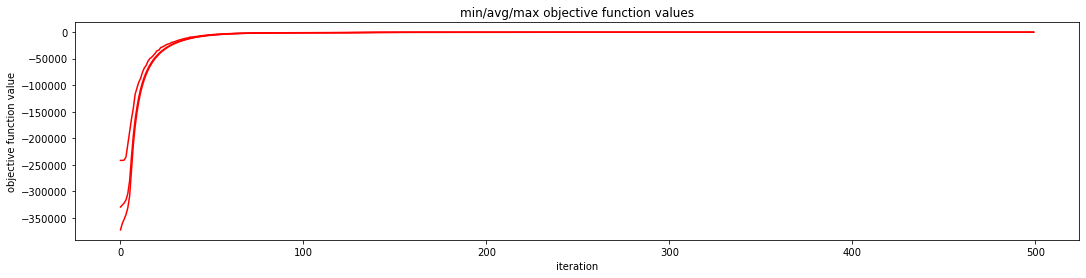

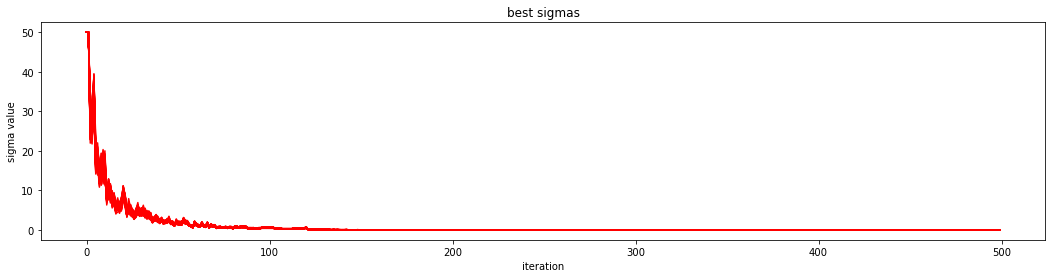

In [60]:
test_and_plot(0, objective_function_F6, 100, 2000, 500, 4000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 50)

#### number_of_offspring = 2000

Iteration 0000 : best score = -250296.38418423, mean score = -331682.03074806.
Iteration 0010 : best score = -154417.33771277, mean score = -246331.66455494.
Iteration 0020 : best score = -76796.78324701, mean score = -93682.87414318.
Iteration 0030 : best score = -44546.11494276, mean score = -53165.03495094.
Iteration 0040 : best score = -27429.80519780, mean score = -33188.96580261.
Iteration 0050 : best score = -16789.00249725, mean score = -20586.57987573.
Iteration 0060 : best score = -10597.00105078, mean score = -12757.21232215.
Iteration 0070 : best score = -7120.25596947, mean score = -8141.23193265.
Iteration 0080 : best score = -4859.81665849, mean score = -5531.14069924.
Iteration 0090 : best score = -3464.01035449, mean score = -3928.60701646.


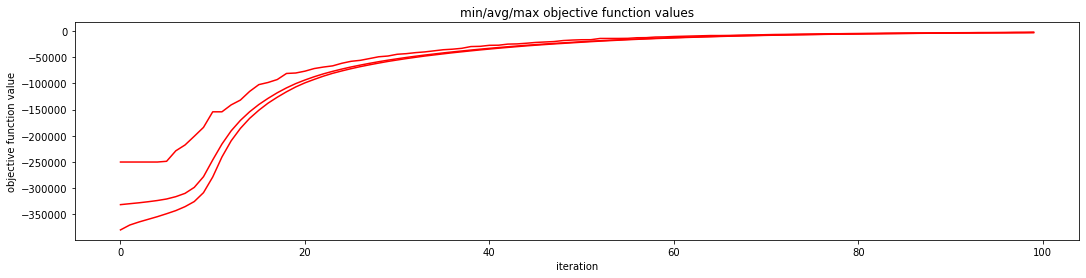

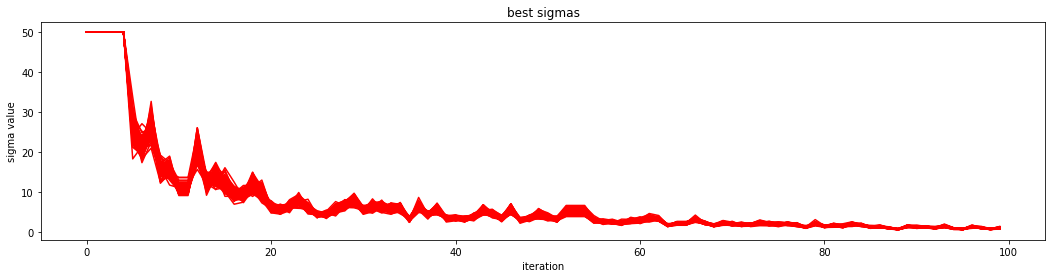

In [61]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 2000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### number_of_offspring = 8000

Iteration 0000 : best score = -245266.01537001, mean score = -327582.86923135.
Iteration 0010 : best score = -68603.86818353, mean score = -83132.68100074.
Iteration 0020 : best score = -20492.12814832, mean score = -25037.73989692.
Iteration 0030 : best score = -7880.85962849, mean score = -9172.68148122.
Iteration 0040 : best score = -3471.87201581, mean score = -3951.63258423.
Iteration 0050 : best score = -1860.99580899, mean score = -2165.87082878.
Iteration 0060 : best score = -1418.30971634, mean score = -1590.82346423.
Iteration 0070 : best score = -1231.06612920, mean score = -1384.21588593.
Iteration 0080 : best score = -1130.68284621, mean score = -1274.70026267.
Iteration 0090 : best score = -911.04394170, mean score = -1009.02489236.


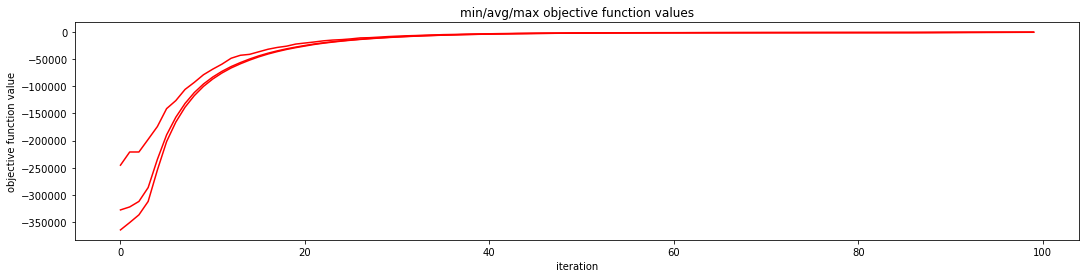

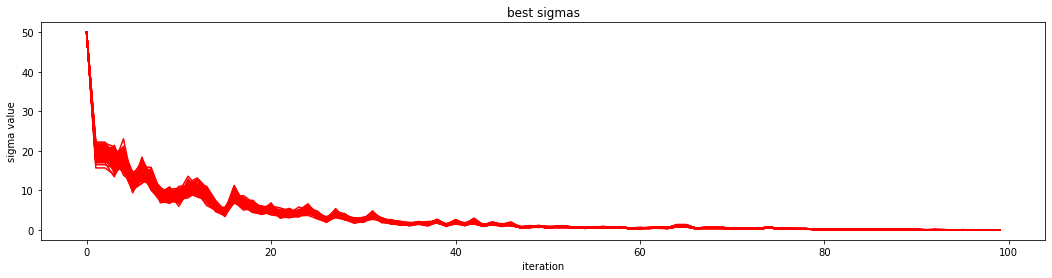

In [62]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 8000, 2, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### number_of_parents = 1

Iteration 0000 : best score = -219869.44616526, mean score = -333412.16228426.
Iteration 0010 : best score = -219869.44616526, mean score = -308883.94011212.
Iteration 0020 : best score = -178943.11889530, mean score = -205213.94045558.
Iteration 0030 : best score = -117745.68609733, mean score = -140862.62045842.
Iteration 0040 : best score = -85806.09375732, mean score = -96260.06458475.
Iteration 0050 : best score = -61374.55776679, mean score = -68224.18692681.
Iteration 0060 : best score = -46427.11710241, mean score = -51003.09126770.
Iteration 0070 : best score = -35931.97782544, mean score = -38989.40322281.
Iteration 0080 : best score = -27917.11490922, mean score = -30533.58542104.
Iteration 0090 : best score = -22696.52717728, mean score = -24976.27321885.


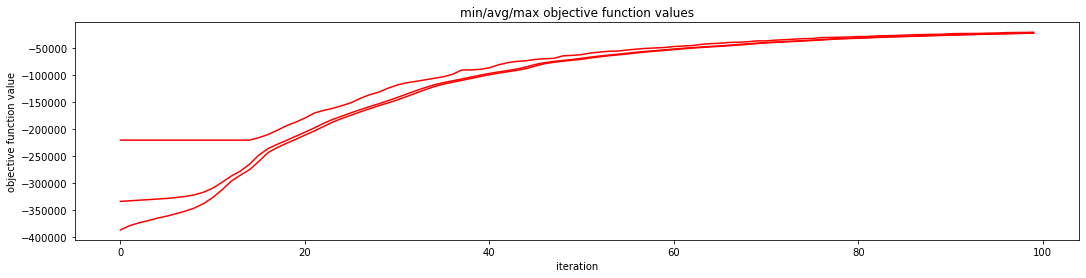

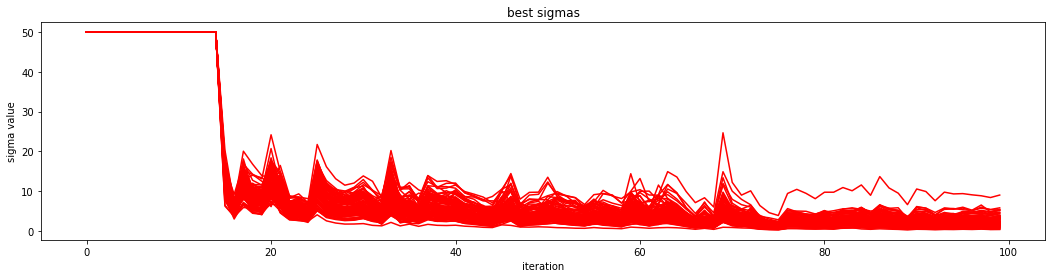

In [63]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 4000, 1, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### number_of_parents = 4

Iteration 0000 : best score = -236641.74359674, mean score = -329172.26860682.
Iteration 0010 : best score = -95909.45179524, mean score = -115141.97328245.
Iteration 0020 : best score = -42987.08115900, mean score = -49666.38345800.
Iteration 0030 : best score = -22788.59640130, mean score = -25845.55312880.
Iteration 0040 : best score = -12413.59895972, mean score = -14344.69274713.
Iteration 0050 : best score = -7367.65300657, mean score = -8324.64633485.
Iteration 0060 : best score = -4614.48997922, mean score = -5125.52794046.
Iteration 0070 : best score = -3095.25146829, mean score = -3408.06569254.
Iteration 0080 : best score = -2206.43586485, mean score = -2454.44015470.
Iteration 0090 : best score = -1759.84974956, mean score = -1963.61853796.


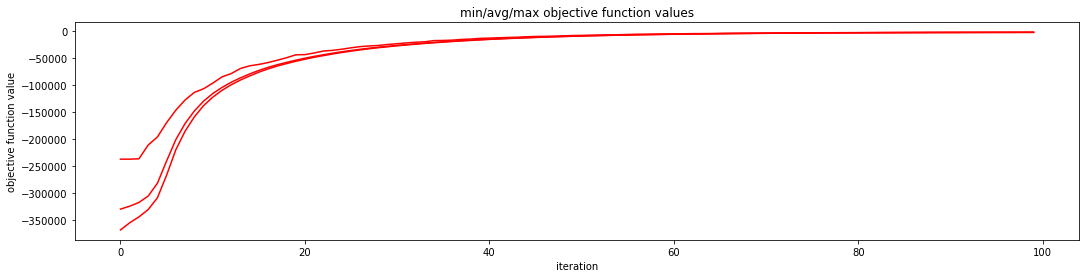

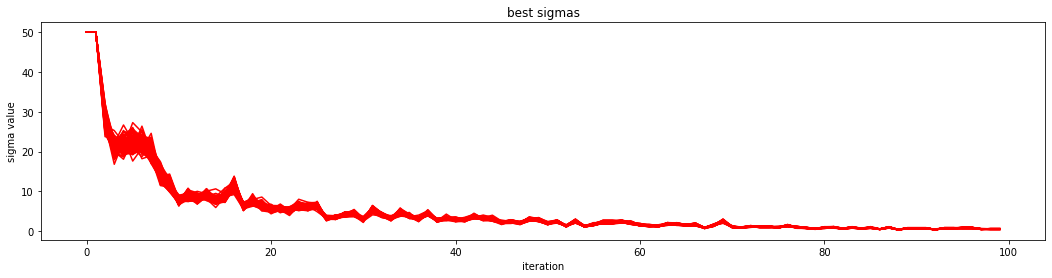

In [64]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 4000, 4, 50.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### sigma = 75

Iteration 0000 : best score = -243572.46125556, mean score = -334790.49315027.
Iteration 0010 : best score = -243572.46125556, mean score = -332711.73661264.
Iteration 0020 : best score = -218903.66739785, mean score = -324587.87090481.
Iteration 0030 : best score = -68505.50840740, mean score = -88021.97916428.
Iteration 0040 : best score = -30483.37357721, mean score = -35835.65359303.
Iteration 0050 : best score = -14711.31869248, mean score = -17246.16076626.
Iteration 0060 : best score = -7567.40055500, mean score = -8722.13359165.
Iteration 0070 : best score = -3941.26726046, mean score = -4637.39748980.
Iteration 0080 : best score = -2393.60078426, mean score = -2756.04043371.
Iteration 0090 : best score = -1762.73243589, mean score = -1975.26341645.


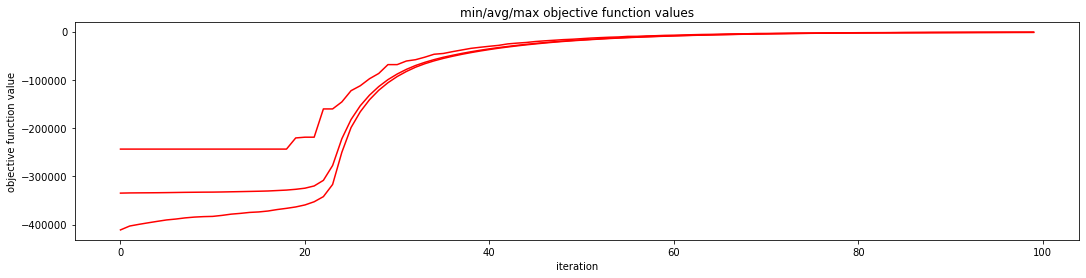

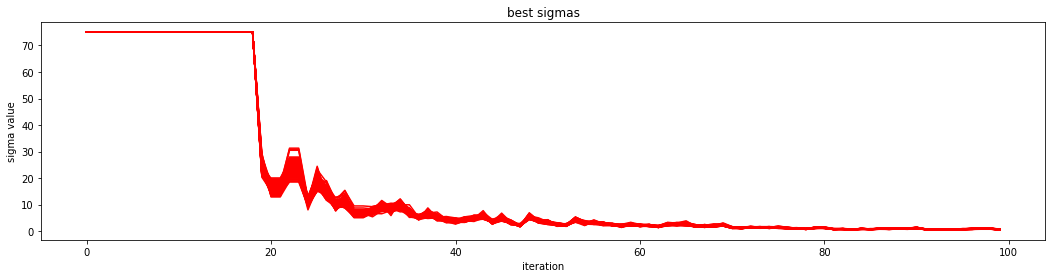

In [71]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 4000, 2, 75.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### sigma = 25

Iteration 0000 : best score = -229138.35966698, mean score = -304070.07574928.
Iteration 0010 : best score = -82615.19853730, mean score = -101285.21246482.
Iteration 0020 : best score = -37606.68640043, mean score = -44821.72253243.
Iteration 0030 : best score = -18327.13708833, mean score = -21748.95753438.
Iteration 0040 : best score = -9373.53094917, mean score = -10913.07902769.
Iteration 0050 : best score = -5132.99136044, mean score = -5812.65154857.
Iteration 0060 : best score = -2958.79207102, mean score = -3387.41835816.
Iteration 0070 : best score = -2035.49520351, mean score = -2259.29343558.
Iteration 0080 : best score = -1563.66753904, mean score = -1771.87433035.
Iteration 0090 : best score = -1345.52471549, mean score = -1520.15034032.


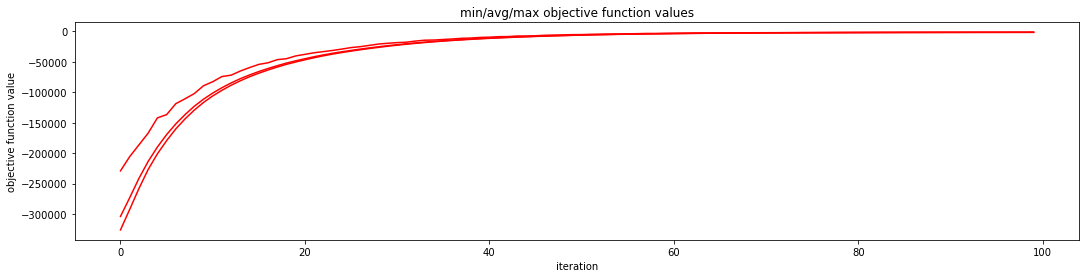

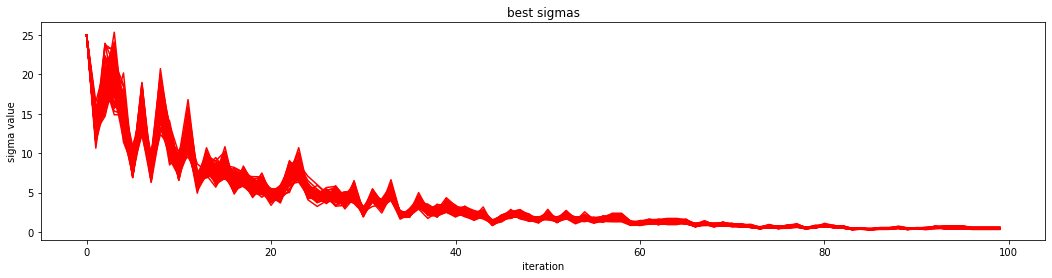

In [72]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 4000, 2, 25.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 10)

#### K = 0.5

Iteration 0000 : best score = -221855.68758544, mean score = -331941.76118522.
Iteration 0010 : best score = -221855.68758544, mean score = -319432.47075446.
Iteration 0020 : best score = -63478.22426782, mean score = -106072.25787811.
Iteration 0030 : best score = -14324.60716982, mean score = -20179.88475034.
Iteration 0040 : best score = -3592.17677131, mean score = -4824.90411473.
Iteration 0050 : best score = -1535.71358052, mean score = -1864.44373950.
Iteration 0060 : best score = -1045.43464856, mean score = -1252.14072647.
Iteration 0070 : best score = -893.07931771, mean score = -1090.82355357.
Iteration 0080 : best score = -852.61693332, mean score = -1025.36176140.
Iteration 0090 : best score = -852.61693332, mean score = -993.86172249.


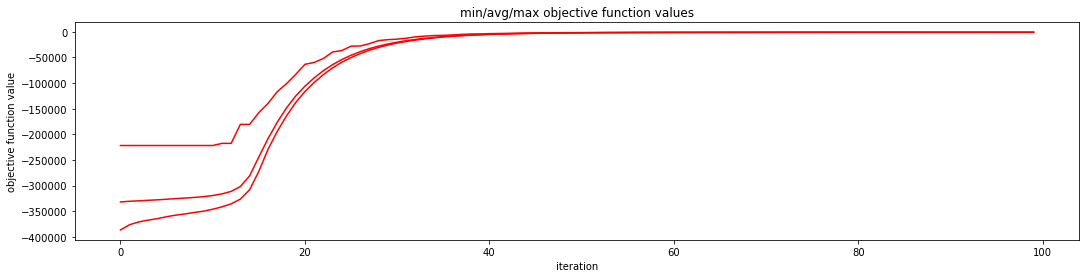

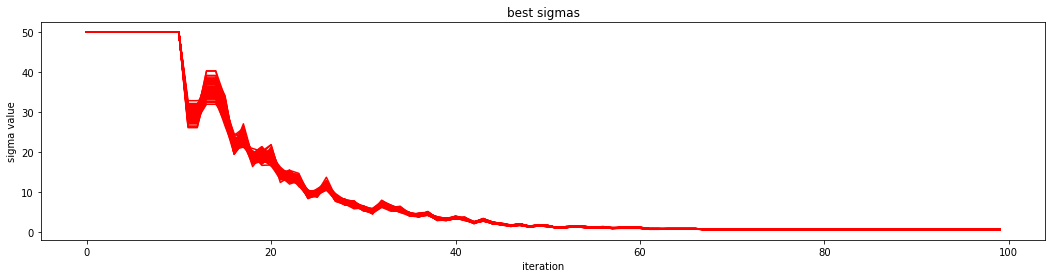

In [68]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 4000, 2, 50.0, 0.5/np.sqrt(2*100), 0.5/np.sqrt(2*np.sqrt(100)), 10)

#### K = 2.0

Iteration 0000 : best score = -239601.75973602, mean score = -324514.73242055.
Iteration 0010 : best score = -110324.65212457, mean score = -126838.04938347.
Iteration 0020 : best score = -64919.77888819, mean score = -73261.46271693.
Iteration 0030 : best score = -36267.26740070, mean score = -41372.85002749.
Iteration 0040 : best score = -20604.26169949, mean score = -24160.20237270.
Iteration 0050 : best score = -12335.33503484, mean score = -14010.39397822.
Iteration 0060 : best score = -7418.96997009, mean score = -8475.57798432.
Iteration 0070 : best score = -4685.15460506, mean score = -5264.68284889.
Iteration 0080 : best score = -3333.18611320, mean score = -3696.87830785.
Iteration 0090 : best score = -2480.54925325, mean score = -2757.22335840.


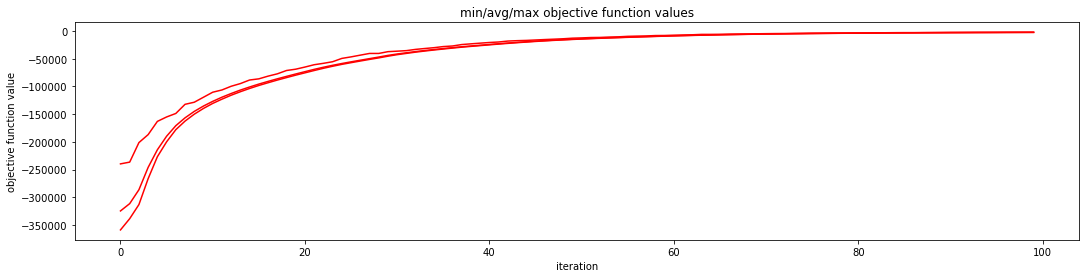

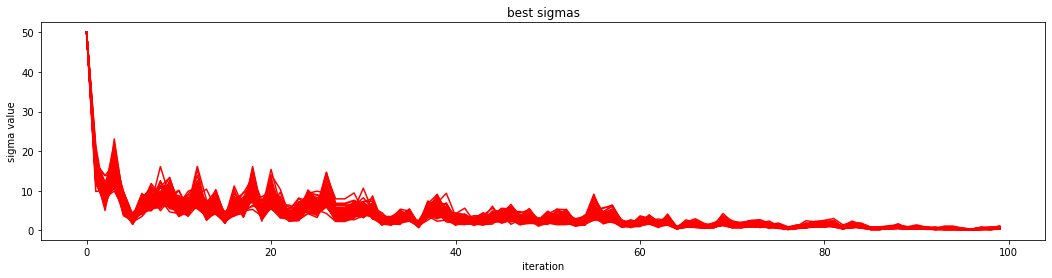

In [69]:
test_and_plot(0, objective_function_F6, 100, 2000, 100, 4000, 2, 50.0, 2/np.sqrt(2*100), 2/np.sqrt(2*np.sqrt(100)), 10)

#### N = 1000, T = 2000, number_of_offspring = 8000, number_of_parents = 2, sigma = 10, K = 0.5

Iteration 0000 : best score = -216800.33850869, mean score = -259637.35542899.
Iteration 0200 : best score = -716.99026505, mean score = -842.30381021.
Iteration 0400 : best score = -716.99026505, mean score = -814.97689918.
Iteration 0600 : best score = -48.75301121, mean score = -48.75301944.
Iteration 0800 : best score = -48.75299380, mean score = -48.75299380.
Iteration 1000 : best score = -48.75299380, mean score = -48.75299380.
Iteration 1200 : best score = -48.75299380, mean score = -48.75299380.
Iteration 1400 : best score = -48.75299380, mean score = -48.75299380.
Iteration 1600 : best score = -48.75299380, mean score = -48.75299380.
Iteration 1800 : best score = -48.75299380, mean score = -48.75299380.


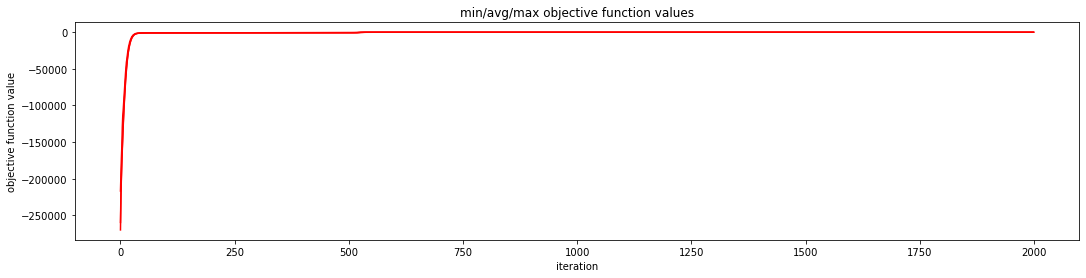

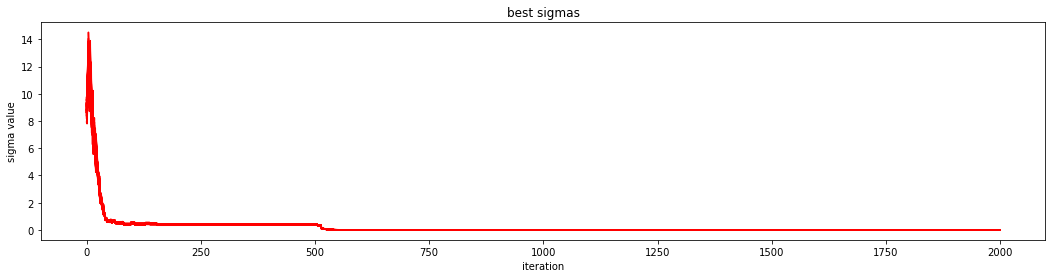

In [77]:
test_and_plot(0, objective_function_F6, 100, 1000, 2000, 8000, 2, 10.0, 0.5/np.sqrt(2*100), 0.5/np.sqrt(2*np.sqrt(100)), 200)

### Zadanie 3

#### Sphere function F1a

Iteration 0000 : best score = -3.01962493, mean score = -6490.66023174.
Iteration 0010 : best score = -0.03735078, mean score = -52.99252203.
Iteration 0020 : best score = -0.00125276, mean score = -1.63735734.
Iteration 0030 : best score = -0.00003497, mean score = -0.04873403.
Iteration 0040 : best score = -0.00000241, mean score = -0.00131442.
Iteration 0050 : best score = -0.00000008, mean score = -0.00003750.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000087.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000002.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


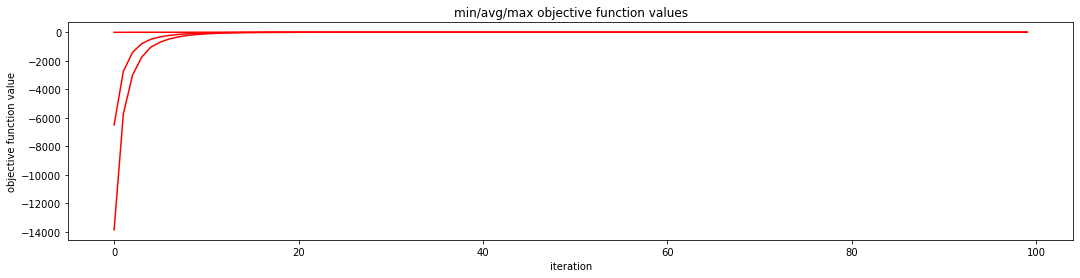

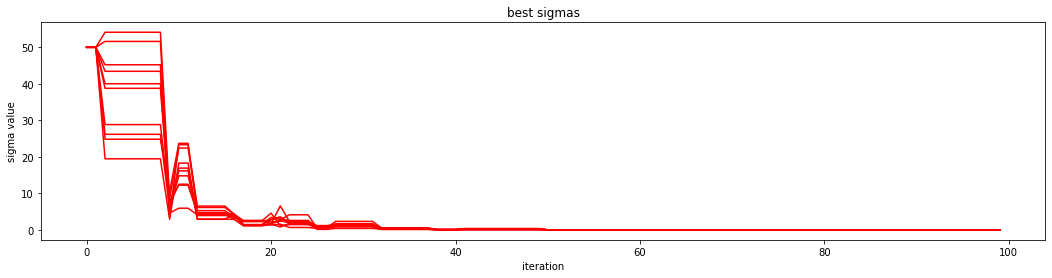

In [53]:
test_and_plot(0, objective_function_F1a, 10, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 10)

#### Sphere function F1b

Iteration 0000 : best score = -23.72096159, mean score = -230524.74066636.
Iteration 0010 : best score = -0.02051114, mean score = -1470.50989209.
Iteration 0020 : best score = -0.02051114, mean score = -161.45456274.
Iteration 0030 : best score = -0.00517420, mean score = -17.87504093.
Iteration 0040 : best score = -0.00052856, mean score = -1.82082550.
Iteration 0050 : best score = -0.00000905, mean score = -0.17793703.
Iteration 0060 : best score = -0.00000011, mean score = -0.01097945.
Iteration 0070 : best score = -0.00000011, mean score = -0.00072956.
Iteration 0080 : best score = -0.00000010, mean score = -0.00003450.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000134.


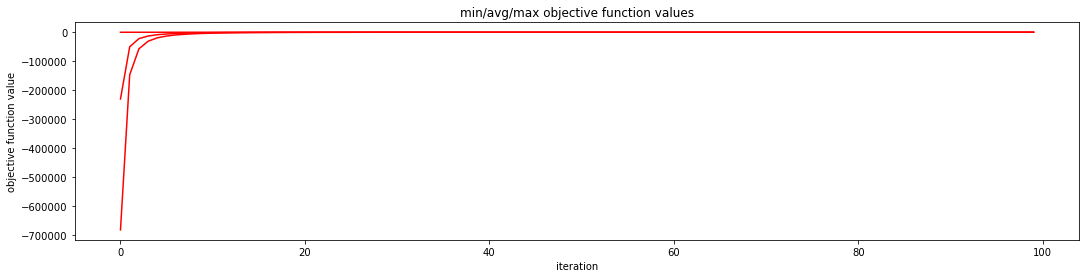

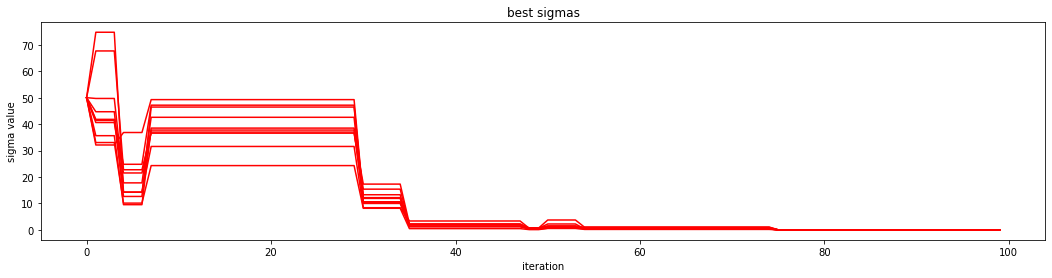

In [54]:
test_and_plot(0, objective_function_F1b, 10, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 10)

#### Sphere function F1c

Iteration 0000 : best score = -0.90785887, mean score = -1733.47561448.
Iteration 0010 : best score = -0.00401479, mean score = -15.09094052.
Iteration 0020 : best score = -0.00060847, mean score = -0.71945399.
Iteration 0030 : best score = -0.00000592, mean score = -0.02207752.
Iteration 0040 : best score = -0.00000013, mean score = -0.00058046.
Iteration 0050 : best score = -0.00000000, mean score = -0.00001495.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000033.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


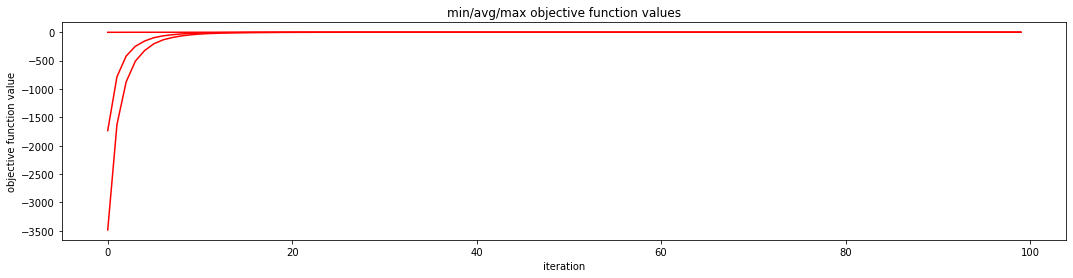

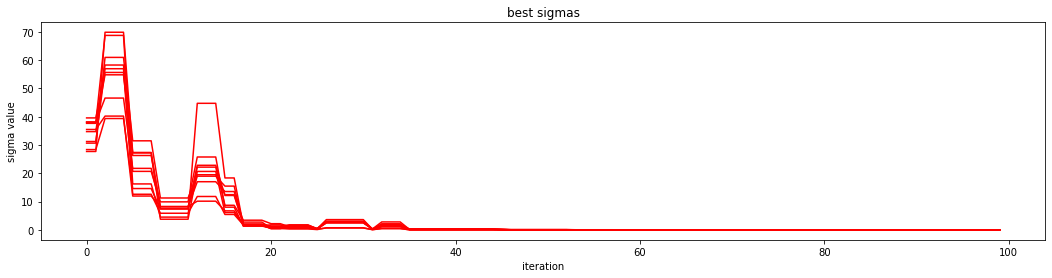

In [55]:
test_and_plot(0, objective_function_F1c, 10, 2000, 100, 4000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 10)